In [1]:
import numpy as np
from scipy import *
from pylab import *
import os
import pickle

%matplotlib inline

In [2]:
# folder_Pk = '/global/cscratch1/sd/jialiu/CAMELS/Pk/' ### original, unorganized Pk
folder_Pk = '/pscratch/sd/j/jialiu/CAMELS/Pk/'
home = '/global/homes/j/jialiu/cosmo_dep_feedback/'

###### the simulation we operate with
isim = 'IllustrisTNG'

labels=[r'$\Omega_m$', r'$\sigma_8$', '$log_{10}(A_1)$', '$log_{10}(A_2)$', '$log_{10}(A_3)$', '$log_{10}(A_4)$']

In [19]:
### fixed parameters: 
Omega_b = 0.049
h = 0.6711
ns = 0.9624
w = -1
mnu = 0.0 #eV
Omega_k = 0.0

fidu_params = [ 0.3, 0.8 ,0. ,  0. ,0. ,0.]
cmap = matplotlib.cm.get_cmap('Spectral') #('viridis')#

In [4]:
kmax=30
k=np.load(home+'Pk/IllustrisTNG_k_m_z=0.00.npy')
Nk=sum(k<kmax)
kcut=k[:Nk]
iz = 0
iset = '1P'

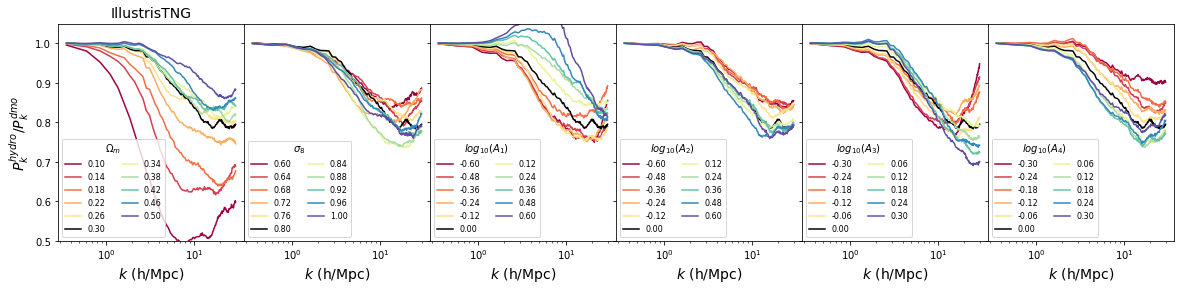

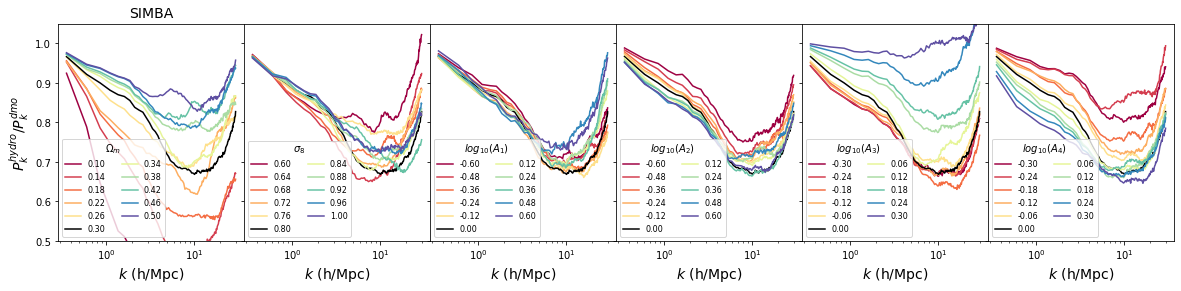

In [21]:
iPk = 'Pk_m'
for isim in ['IllustrisTNG', 'SIMBA']:
    ifn = home+'Pk/%s_%s_%s_z=%.2f.npy'%(isim, iPk, iset, iz)
    ifn_DM=home+'Pk/%s_%s_%s_z=%.2f_DM.npy'%(isim, 'Pk_m', iset, iz)
    Pk_arr = np.load(ifn)
    Pk_DM_arr = np.load(ifn_DM)

    params = Pk_arr[:, :6]
    r = Pk_arr[:, 6:]/Pk_DM_arr[:, 6:]
    params.shape, Pk_arr.shape

    f, axes=subplots(1, 6, figsize=(20,4))
    for i in range(6): ## number of parameters
        ax=axes.reshape(-1)[i]
        idx = where(params[:,i]!=fidu_params[i])[0] # select the varying one on specific parameter
        idx = concatenate([idx[:5], [0,], idx[5:]]) ## inserting the fiducial model in the middle
        j=0
        colors = cmap(linspace(0,1,len(idx)))
        for iidx in idx:
            icolor=colors[j]
            if j==5: ## fiducial model
                icolor='k'
            iparam=params[iidx,i]
            ax.plot(kcut, r[iidx], c=icolor,label='%.2f'%(iparam))
            j+=1
            
        ax.legend(title='%s'%(labels[i]),ncol=2,fontsize=8,loc='lower left')
        ax.set_xscale('log')
        ax.set_ylim(0.5, 1.05)
        ax.set_xlabel('$k$ (h/Mpc)',fontsize=14)
        ax.set_xlabel('$k$ (h/Mpc)',fontsize=14)
        if i == 0:
            ax.set_title(isim,fontsize=14)
            ax.set_ylabel('$P_k^{hydro}/P_k^{dmo}$',fontsize=14)
        else:
            ax.yaxis.set_ticklabels([])
            
    plt.subplots_adjust(hspace=0, wspace=0)
    show()

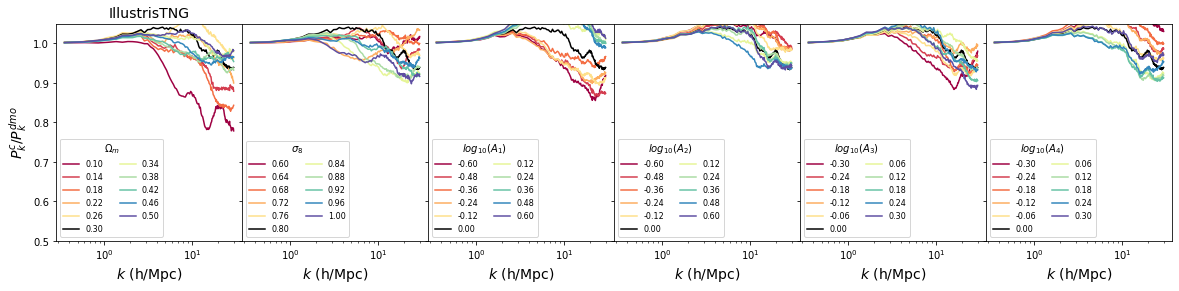

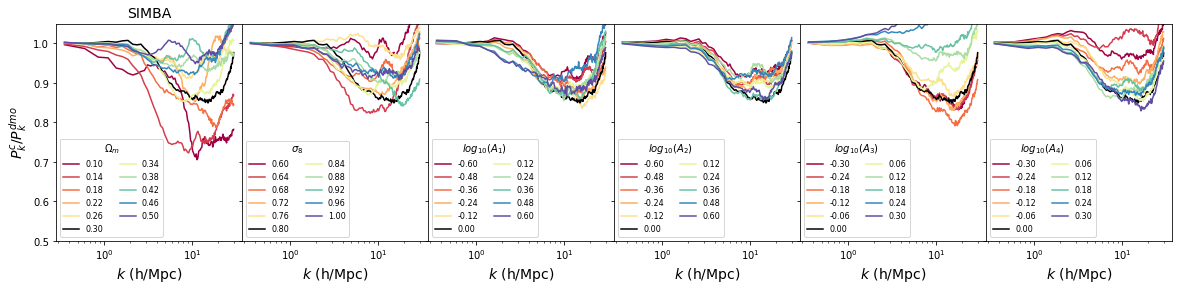

In [26]:
iPk = 'Pk_c'

for isim in ['IllustrisTNG', 'SIMBA']:
    ifn = home+'Pk/%s_%s_%s_z=%.2f.npy'%(isim, iPk, iset, iz)
    ifn_DM=home+'Pk/%s_%s_%s_z=%.2f_DM.npy'%(isim, 'Pk_m', iset, iz)
    Pk_arr = np.load(ifn)
    Pk_DM_arr = np.load(ifn_DM)

    params = Pk_arr[:, :6]
    r = Pk_arr[:, 6:]/Pk_DM_arr[:, 6:]
    params.shape, Pk_arr.shape

    f, axes=subplots(1, 6, figsize=(20,4))
    # f, axes=subplots(2, 3, figsize=(16,6))
    for i in range(6): ## number of parameters
        ax=axes.reshape(-1)[i]
        idx = where(params[:,i]!=fidu_params[i])[0] # select the varying one on specific parameter
        idx = concatenate([idx[:5], [0,], idx[5:]]) ## inserting the fiducial model in the middle
        j=0
        colors = cmap(linspace(0,1,len(idx)))
        for iidx in idx:
            icolor=colors[j]
            if j==5: ## fiducial model
                icolor='k'
            iparam=params[iidx,i]
            ax.plot(kcut, r[iidx], c=icolor,label='%.2f'%(iparam))
            j+=1

        ax.legend(title='%s'%(labels[i]),ncol=2,fontsize=8,loc='lower left')
        ax.set_xscale('log')
        ax.set_ylim(0.5, 1.05)
        ax.set_xlabel('$k$ (h/Mpc)',fontsize=14)
        ax.set_xlabel('$k$ (h/Mpc)',fontsize=14)
        if i == 0:
            ax.set_title(isim,fontsize=14)
            ax.set_ylabel('$P_k^{c}/P_k^{dmo}$',fontsize=14)
        else:
            ax.yaxis.set_ticklabels([])
            
    plt.subplots_adjust(hspace=0, wspace=0)
    show()

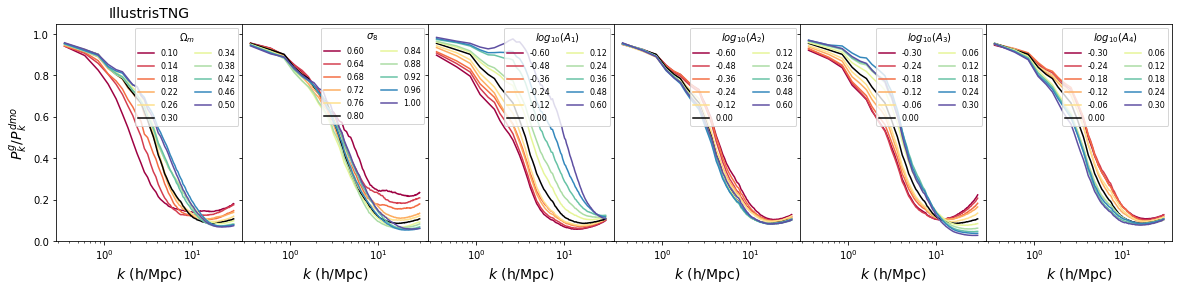

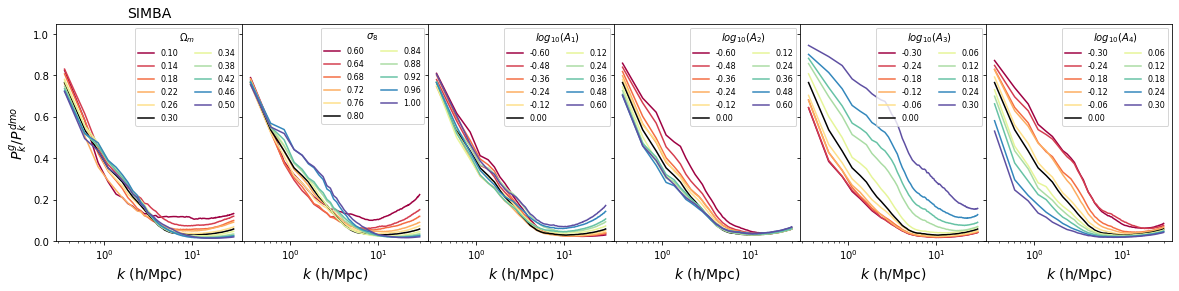

In [25]:
iPk = 'Pk_g'

for isim in ['IllustrisTNG', 'SIMBA']:
    ifn = home+'Pk/%s_%s_%s_z=%.2f.npy'%(isim, iPk, iset, iz)
    ifn_DM=home+'Pk/%s_%s_%s_z=%.2f_DM.npy'%(isim, 'Pk_m', iset, iz)
    Pk_arr = np.load(ifn)
    Pk_DM_arr = np.load(ifn_DM)

    params = Pk_arr[:, :6]
    r = Pk_arr[:, 6:]/Pk_DM_arr[:, 6:]
    params.shape, Pk_arr.shape

    f, axes=subplots(1, 6, figsize=(20,4))
    for i in range(6): ## number of parameters
        ax=axes.reshape(-1)[i]
        idx = where(params[:,i]!=fidu_params[i])[0] # select the varying one on specific parameter
        idx = concatenate([idx[:5], [0,], idx[5:]]) ## inserting the fiducial model in the middle
        j=0
        colors = cmap(linspace(0,1,len(idx)))
        for iidx in idx:
            icolor=colors[j]
            if j==5: ## fiducial model
                icolor='k'
            iparam=params[iidx,i]
            ax.plot(kcut, r[iidx], c=icolor,label='%.2f'%(iparam))
            j+=1

        ax.legend(title='%s'%(labels[i]),ncol=2,fontsize=8,loc='upper right')
        ax.set_xscale('log')
        ax.set_ylim(0., 1.05)
        ax.set_xlabel('$k$ (h/Mpc)',fontsize=14)
        ax.set_xlabel('$k$ (h/Mpc)',fontsize=14)
        if i == 0:
            ax.set_title(isim,fontsize=14)
            ax.set_ylabel('$P_k^{g}/P_k^{dmo}$',fontsize=14)
        else:
            ax.yaxis.set_ticklabels([])
            
    plt.subplots_adjust(hspace=0, wspace=0)
    show()

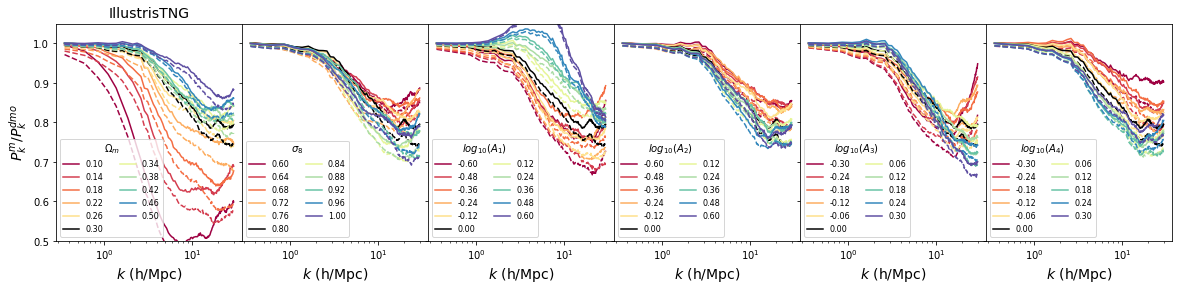

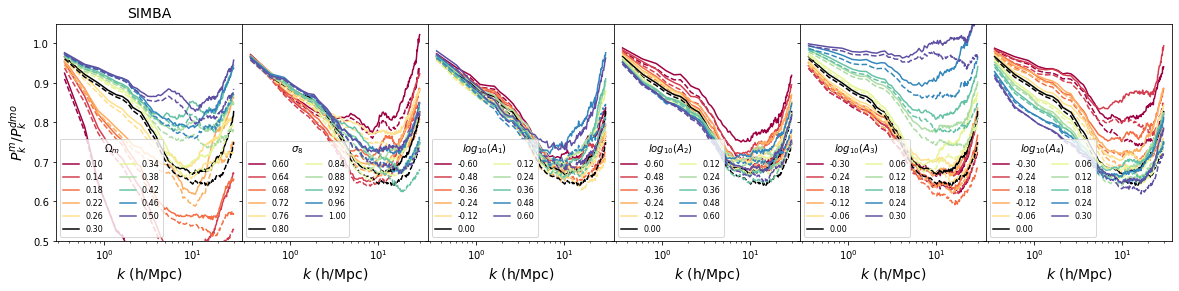

In [24]:
########### check if Pm=fb Pb + (1-fb) Pc is a good assumption

for isim in ['IllustrisTNG', 'SIMBA']:
    ifn_g = home+'Pk/%s_%s_%s_z=%.2f.npy'%(isim, 'Pk_g', iset, iz)
    ifn_c=home+'Pk/%s_%s_%s_z=%.2f.npy'%(isim, 'Pk_c', iset, iz)
    ifn_m = home+'Pk/%s_%s_%s_z=%.2f.npy'%(isim, 'Pk_m', iset, iz)
    ifn_DM=home+'Pk/%s_%s_%s_z=%.2f_DM.npy'%(isim, 'Pk_m', iset, iz)
    Pk_g_arr = np.load(ifn_g)
    Pk_c_arr = np.load(ifn_c)
    Pk_m_arr = np.load(ifn_m)
    Pk_DM_arr = np.load(ifn_DM)

    params = Pk_arr[:, :6]
    Omega_m = params[:,0].reshape(-1,1)
    
    fb = Omega_b/Omega_m
    fc = 1-fb
    
    ## g1 = 
    ## ^ eq 56 & 57 of Shoji & Komatsu 2009
    r = Pk_m_arr[:, 6:]/Pk_DM_arr[:, 6:]
    r_cg = (fb**2*Pk_g_arr[:, 6:] + fc**2*Pk_c_arr[:, 6:] +
           2*fb*fc*sqrt(Pk_g_arr[:, 6:])*sqrt(Pk_c_arr[:, 6:]))/Pk_DM_arr[:, 6:]

    f, axes=subplots(1, 6, figsize=(20,4))
    for i in range(6): ## number of parameters
        ax=axes.reshape(-1)[i]
        idx = where(params[:,i]!=fidu_params[i])[0] # select the varying one on specific parameter
        idx = concatenate([idx[:5], [0,], idx[5:]]) ## inserting the fiducial model in the middle
        j=0
        colors = cmap(linspace(0,1,len(idx)))
        for iidx in idx:
            icolor=colors[j]
            if j==5: ## fiducial model
                icolor='k'
            iparam=params[iidx,i]
            ax.plot(kcut, r[iidx], c=icolor,label='%.2f'%(iparam))
            ax.plot(kcut, r_cg[iidx], '--', c=icolor)
            j+=1
            
        ax.legend(title='%s'%(labels[i]),ncol=2,fontsize=8,loc='lower left')
        ax.set_xscale('log')
        ax.set_ylim(0.5, 1.05)
        ax.set_xlabel('$k$ (h/Mpc)',fontsize=14)
        ax.set_xlabel('$k$ (h/Mpc)',fontsize=14)
        if i == 0:
            ax.set_title(isim,fontsize=14)
            ax.set_ylabel('$P_k^{m}/P_k^{dmo}$',fontsize=14)
        else:
            ax.yaxis.set_ticklabels([])
            
    plt.subplots_adjust(hspace=0, wspace=0)
    show()

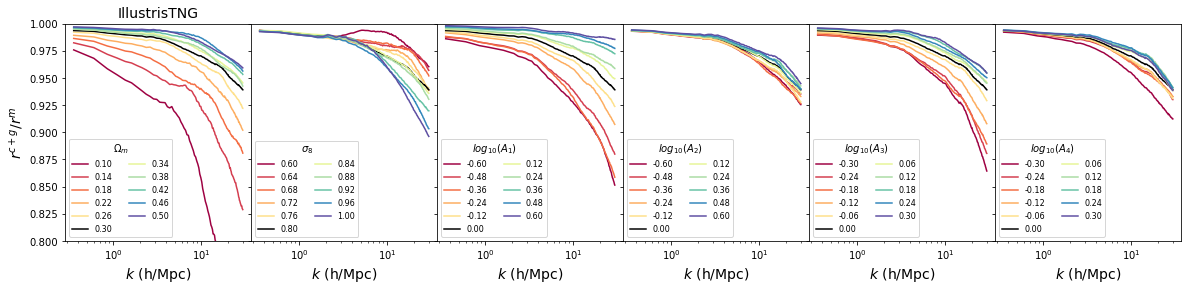

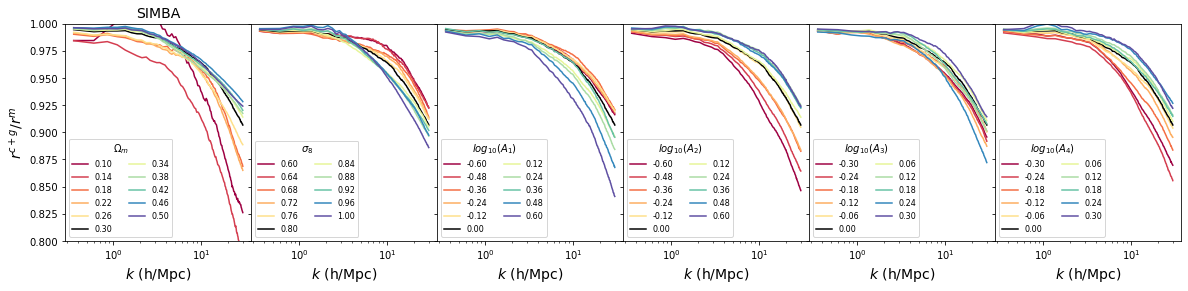

In [23]:
########### same as above, but with ratio of the ratios

for isim in ['IllustrisTNG', 'SIMBA']:
    ifn_g = home+'Pk/%s_%s_%s_z=%.2f.npy'%(isim, 'Pk_g', iset, iz)
    ifn_c=home+'Pk/%s_%s_%s_z=%.2f.npy'%(isim, 'Pk_c', iset, iz)
    ifn_m = home+'Pk/%s_%s_%s_z=%.2f.npy'%(isim, 'Pk_m', iset, iz)
    ifn_DM=home+'Pk/%s_%s_%s_z=%.2f_DM.npy'%(isim, 'Pk_m', iset, iz)
    Pk_g_arr = np.load(ifn_g)
    Pk_c_arr = np.load(ifn_c)
    Pk_m_arr = np.load(ifn_m)
    Pk_DM_arr = np.load(ifn_DM)

    params = Pk_arr[:, :6]
    Omega_m = params[:,0].reshape(-1,1)
    
    fb = Omega_b/Omega_m
    fc = 1-fb
    
    r = Pk_m_arr[:, 6:]/Pk_DM_arr[:, 6:]
    r_cg = (fb**2*Pk_g_arr[:, 6:] + fc**2*Pk_c_arr[:, 6:] +
           2*fb*fc*sqrt(Pk_g_arr[:, 6:])*sqrt(Pk_c_arr[:, 6:]))/Pk_DM_arr[:, 6:]

    f, axes=subplots(1, 6, figsize=(20,4))
    for i in range(6): ## number of parameters
        ax=axes.reshape(-1)[i]
        idx = where(params[:,i]!=fidu_params[i])[0] # select the varying one on specific parameter
        idx = concatenate([idx[:5], [0,], idx[5:]]) ## inserting the fiducial model in the middle
        j=0
        colors = cmap(linspace(0,1,len(idx)))
        for iidx in idx:
            icolor=colors[j]
            if j==5: ## fiducial model
                icolor='k'
            iparam=params[iidx,i]
            ax.plot(kcut, r_cg[iidx]/r[iidx], c=icolor,label='%.2f'%(iparam))
            j+=1
            
        ax.legend(title='%s'%(labels[i]),ncol=2,fontsize=8,loc='lower left')
        ax.set_xscale('log')
        ax.set_ylim(0.8, 1.)
        ax.set_xlabel('$k$ (h/Mpc)',fontsize=14)
        ax.set_xlabel('$k$ (h/Mpc)',fontsize=14)
        if i == 0:
            ax.set_title(isim,fontsize=14)
            ax.set_ylabel('$r^{c+g}/r^{m}$',fontsize=14)
        else:
            ax.yaxis.set_ticklabels([])
            
    plt.subplots_adjust(hspace=0, wspace=0)
    show()